<a href="https://colab.research.google.com/github/Gabriel-dev576/Estad-stica-I-informe-II/blob/main/Estadisticaphyton2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files # Para cargar archivos en google colab
import io
from google.colab import files
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

In [3]:
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [4]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [7]:
tabla1 = tabla[["TALLA_NAC", "T_GES"]]
tabla1.head(4)

,TALLA_NAC,T_GES
COD_DPTO,,
23,5,4
11,4,4
11,4,4
11,5,4


In [15]:
df2= tabla1[(tabla.T_GES < 99) & (tabla1["T_GES"] !=9 ) &   (tabla1.TALLA_NAC != 9)  ]
df2.head(4)

,TALLA_NAC,T_GES
COD_DPTO,,
23,5,4
11,4,4
11,4,4
11,5,4


In [ ]:
#diagrama de barras edad de la madre

In [17]:
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)
df2.T_GES.head(2)

/tmp/ipython-input-2298765802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


,T_GES
COD_DPTO,
23,4
11,4


In [20]:
df2.loc[(df2.T_GES == "1" ), "T_GES"] , df2.loc[(df2.T_GES == "2" ), "T_GES"],df2.loc[(df2.T_GES == "3" ), "T_GES"], df2.loc[(df2.T_GES == "4" ), "T_GES"] = "10-14", "15-19" , "20-34" , "25-29"
df2.loc[(df2.T_GES == "5" ), "T_GES"]  , df2.loc[(df2.T_GES == "6" ), "T_GES"], df2.loc[(df2.T_GES== "7" ), "T_GES"] , df2.loc[(df2.T_GES == "8" ), "T_GES"] =  "30-34" ,"35-39" , "40-44", "45-49"
df2.loc[(df2.T_GES == "9" ), "T_GES"] , df2.loc[(df2.T_GES == "99" ), "T_GES"] = "50-55" , "NA"

<BarContainer object of 6 artists>

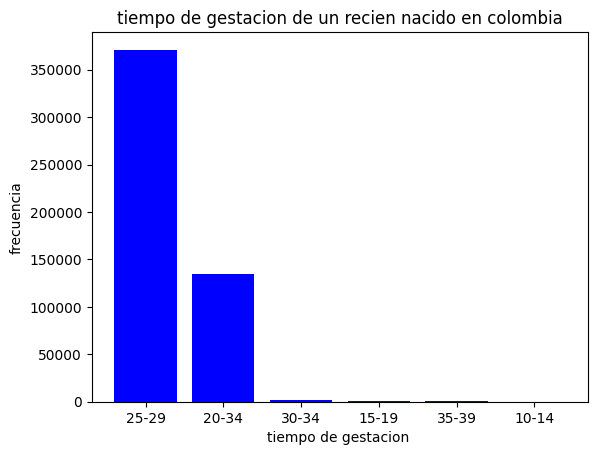

In [21]:
plt.title('tiempo de gestacion de un recien nacido en colombia')
ax = plt.subplot()
ax.set_xlabel('tiempo de gestacion ')
ax.set_ylabel('frecuencia')
x_values = df2.T_GES.unique()
y_values= df2.T_GES.value_counts().tolist()
plt.bar(x_values , y_values , color = "blue"  )

In [22]:
sizes = np.array(y_values)
sizes

array([371090, 134513,   1950,    778,    477,     19])

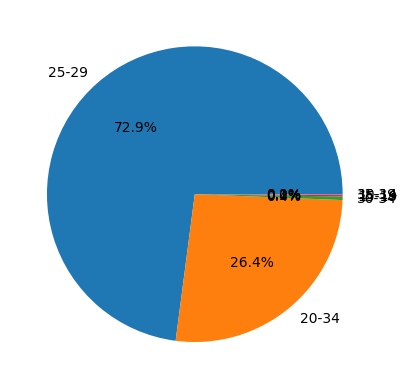

In [23]:
plt.pie(y_values, labels=x_values , autopct = '%1.1f%%')
plt.show()

In [25]:
len(df2.T_GES)

508827

In [26]:
porcentaje =  [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['25-29' '20-34' '30-34' '15-19' '35-39' '10-14']
[72.93048521403149, 26.43590061062011, 0.383234380251048, 0.1529006911975976, 0.09374502532294866, 0.003734078576805083]


In [27]:
tabla_cont = pd.crosstab(df2.T_GES , df2["TALLA_NAC"])
tabla_cont

TALLA_NAC,1,2,3,4,5,6
T_GES,,,,,,
10-14,2,11,5,0,1,0
15-19,2,251,1646,50,1,0
20-34,0,44,3357,95455,35657,0
25-29,0,0,46,140106,230919,19
30-34,0,0,0,116,360,1
35-39,0,1,17,478,282,0


In [ ]:
df2.loc[(df2.T_GES == 1 ), "T_GES"] , df2.loc[(df2.T_GES == 2 ), "T_GES"],df2.loc[(df2.T_GES == 3 ), "T_GES"], df2.loc[(df2.T_GES == 4 ), "T_GES"] = "A", "B" , "O" , "AB"
df2.loc[(df2.IDFACTORRH == 1 ), "IDFACTORRH"]  , df2.loc[(df2.IDFACTORRH == 2 ), "IDFACTORRH"] =  "positivo" , "negativo"
df2.IDHEMOCLAS ,  df2.IDFACTORRH = df2.IDHEMOCLAS.astype(str) , df2.IDFACTORRH.astype(str)
df2.head(3)

/tmp/ipython-input-2989733724.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.IDHEMOCLAS == 1 ), "IDHEMOCLAS"] , df2.loc[(df2.IDHEMOCLAS == 2 ), "IDHEMOCLAS"],df2.loc[(df2.IDHEMOCLAS == 3 ), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 4 ), "IDHEMOCLAS"] = "A", "B" , "O" , "AB"
/tmp/ipython-input-2989733724.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'positivo' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.IDFACTORRH == 1 ), "IDFACTORRH"]  , df2.loc[(df2.IDFACTORRH == 2 ), "IDFACTORRH"] =  "positivo" , "negativo"
/tmp/ipython-input-2989733724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,5,A,positivo
11,6,A,positivo
11,5,O,positivo


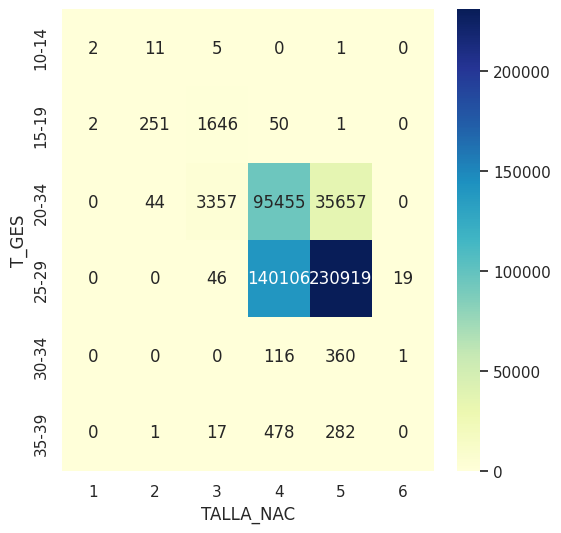

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True , fmt='d', cmap='YlGnBu' , cbar= True )
plt.show()

In [29]:
res = stats.chi2_contingency(tabla_cont)
chi , valor_p, _ ,_=res
print ( f" el valor de la estadistica chi cuadrado {chi} y el valor p es d {valor_p}")

 el valor de la estadistica chi cuadrado 283302.7467337463 y el valor p es d 0.0


In [31]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_de_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1,2-1)))
print(f"los coeficientes de contingencia , phi y v de cramer estan respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y  {coeficiente_v_de_cramer}")

los coeficientes de contingencia , phi y v de cramer estan respectivamente dados por 0.5980358668183134, 0.7461743542999918 y  0.7461743542999918
